## Lets discuss about Air Quality 

Air Quality is one of the important aspects of day to day life.Air Quality is included in the action plans promoted by the Ministry of Health to reduce
population exposure to air pollution. Recent studies indicate that The 2020 National Energy Strategy could prevent 17%
of the PM2.5, and 57% of the NO2 attributable deaths.
Compliance with the EU Directive 50/2008 with a 2005 baseline situation could reduce attributable mortality due to
PM2.5 or NO2 by around 20% (30% in urban areas).Humidity and temperature are two important compenents of Air.
Humidity is the concentration of water vapor present in the air.The amount of water vapor contained within a parcel of air can vary significantly. 
For example, a parcel of air near saturation may contain 28 g (0.99 oz) of water per cubic metre of air at 30 °C (86 °F),
 but only 8 g (0.28 oz) of water per cubic metre of air at 8 °C (46 °F).
Absolute humidity describes the water content of air and is expressed in either grams per cubic metre[2] or grams per kilogram.
We have taken a dataset which contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. 
The device was located on the field in a significantly polluted area, at road level,within an Italian city. 
Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses.
Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located
reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008
 (citation required) eventually affecting sensors concentration estimation capabilities.This dataset can be used exclusively for research.
 
 <img src="humid2.png" width=400 />


# Data Set Information:

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.


# Attribute Information:
0 Date (DD/MM/YYYY)

1 Time (HH.MM.SS)

2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)

3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)

4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)

5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)

6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)

7 True hourly averaged NOx concentration in ppb (reference analyzer)

8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)

9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)

10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)

11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)

12 Temperature in Â°C

13 Relative Humidity (%)

14 AH Absolute Humidity

In [101]:
!pip install arviz==0.6.1
!pip install pymc3==3.11.1
!pip install Theano==1.0.4

  Using cached arviz-0.6.1-py3-none-any.whl (1.4 MB)
  Attempting uninstall: arviz
    Found existing installation: arviz 0.11.4
    Uninstalling arviz-0.11.4:
      Successfully uninstalled arviz-0.11.4


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

pymc3 3.11.0 requires arviz>=0.11.0, but you'll have arviz 0.6.1 which is incompatible.


  Using cached pymc3-3.11.1-py3-none-any.whl (868 kB)
  Using cached arviz-0.11.4-py3-none-any.whl (1.6 MB)
Processing c:\users\patol\appdata\local\pip\cache\wheels\0e\41\d2\82c7b771236f987def7fe2e51855cce22b270327f3fedec57c\theano_pymc-1.1.2-py3-none-any.whl
  Attempting uninstall: arviz
    Found existing installation: arviz 0.6.1
    Uninstalling arviz-0.6.1:
      Successfully uninstalled arviz-0.6.1
  Attempting uninstall: theano-pymc
    Found existing installation: Theano-PyMC 1.1.0
    Uninstalling Theano-PyMC-1.1.0:
      Successfully uninstalled Theano-PyMC-1.1.0
  Attempting uninstall: pymc3
    Found existing installation: pymc3 3.11.0
    Uninstalling pymc3-3.11.0:
      Successfully uninstalled pymc3-3.11.0


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st

In [52]:
airUCI = pd.read_csv("AirQualityUCI.csv", sep = ";", decimal = ",")

In [53]:
airUCI.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.60,"1,360.00",150.00,11.90,"1,046.00",166.00,"1,056.00",113.00,"1,692.00","1,268.00",13.60,48.90,0.76,nan,nan
1,10/03/2004,19.00.00,2.00,"1,292.00",112.00,9.40,955.00,103.00,"1,174.00",92.00,"1,559.00",972.00,13.30,47.70,0.73,nan,nan
2,10/03/2004,20.00.00,2.20,"1,402.00",88.00,9.00,939.00,131.00,"1,140.00",114.00,"1,555.00","1,074.00",11.90,54.00,0.75,nan,nan
3,10/03/2004,21.00.00,2.20,"1,376.00",80.00,9.20,948.00,172.00,"1,092.00",122.00,"1,584.00","1,203.00",11.00,60.00,0.79,nan,nan
4,10/03/2004,22.00.00,1.60,"1,272.00",51.00,6.50,836.00,131.00,"1,205.00",116.00,"1,490.00","1,110.00",11.20,59.60,0.79,nan,nan


# Data Cleaning

Dropping unnecesary columns

In [54]:
airUCI = airUCI.drop(["Unnamed: 15", "Unnamed: 16"], axis = 1)

In [55]:
airUCI.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

renaming columns for easy analysis

In [56]:
df = airUCI
df = df.rename(columns={"CO(GT)": "COGT", "PT08.S1(CO)": "PT08S1", "NMHC(GT)": "NMHC", "C6H6(GT)" : "C6H6", "PT08.S2(NMHC)": "PT08S2", "NOx(GT)": "NOxGT", "PT08.S3(NOx)":"PT08S3", "NO2(GT)":"NO2GT", "PT08.S4(NO2)": "PT08S4", "PT08.S5(O3)":"PT08S5" })

In [57]:
for col in df.columns:
    if(col == 'Date' or col == 'Time'):
        continue
    df[col] = df[col].replace(-200,float(np.NaN))
    df[col] = df[col].fillna(df[col].mean())

In [58]:
df["Date"] = pd.to_datetime(df["Date"])

In [59]:
df = df.dropna()
df.head(5)

,Date,Time,COGT,PT08S1,NMHC,C6H6,PT08S2,NOxGT,PT08S3,NO2GT,PT08S4,PT08S5,T,RH,AH
0,2004-10-03,18.00.00,2.60,"1,360.00",150.00,11.90,"1,046.00",166.00,"1,056.00",113.00,"1,692.00","1,268.00",13.60,48.90,0.76
1,2004-10-03,19.00.00,2.00,"1,292.00",112.00,9.40,955.00,103.00,"1,174.00",92.00,"1,559.00",972.00,13.30,47.70,0.73
2,2004-10-03,20.00.00,2.20,"1,402.00",88.00,9.00,939.00,131.00,"1,140.00",114.00,"1,555.00","1,074.00",11.90,54.00,0.75
3,2004-10-03,21.00.00,2.20,"1,376.00",80.00,9.20,948.00,172.00,"1,092.00",122.00,"1,584.00","1,203.00",11.00,60.00,0.79
4,2004-10-03,22.00.00,1.60,"1,272.00",51.00,6.50,836.00,131.00,"1,205.00",116.00,"1,490.00","1,110.00",11.20,59.60,0.79


Confirming for how many times data was recorded each day

In [60]:
df['Date'].value_counts()

2004-09-07    24
2004-12-29    24
2004-10-28    24
2004-05-23    24
2004-03-27    24
              ..
2004-07-31    24
2004-11-09    24
2004-06-04    24
2005-04-04    15
2004-10-03     6
Name: Date, Length: 391, dtype: int64

Dividing data into three quaters as the temparature majorly varies in morning, afternoon, and at night

First Quater: timeframe is from 12 Am to 8 AM
    
Second Quater time frame is from 8 AM to 4 PM

Third Quater time frame is from 4 PM to 11 PM

In [61]:
dfFQ = df[(df["Time"]<= "08.00.00") & (df["Time"]> "00.00.00")]
dfSQ = df[(df["Time"]<= "16.00.00") & (df["Time"]> "08.00.00")]
dfTQ = df[(df["Time"]<= "23.00.00") & (df["Time"]> "16.00.00")]
dfSQ.head()

,Date,Time,COGT,PT08S1,NMHC,C6H6,PT08S2,NOxGT,PT08S3,NO2GT,PT08S4,PT08S5,T,RH,AH
15,2004-11-03,09.00.00,2.20,"1,351.00",87.00,9.50,960.00,129.00,"1,079.00",101.00,"1,583.00","1,028.00",10.50,60.60,0.77
16,2004-11-03,10.00.00,1.70,"1,233.00",77.00,6.30,827.00,112.00,"1,218.00",98.00,"1,446.00",860.00,10.80,58.40,0.76
17,2004-11-03,11.00.00,1.50,"1,179.00",43.00,5.00,762.00,95.00,"1,328.00",92.00,"1,362.00",671.00,10.50,57.90,0.74
18,2004-11-03,12.00.00,1.60,"1,236.00",61.00,5.20,774.00,104.00,"1,301.00",95.00,"1,401.00",664.00,9.50,66.80,0.80
19,2004-11-03,13.00.00,1.90,"1,286.00",63.00,7.30,869.00,146.00,"1,162.00",112.00,"1,537.00",799.00,8.30,76.40,0.84


# data Visualization and analysis

In [62]:
dfPlot = df.groupby(df["Time"]).mean()
dfPlot.head(24)

,COGT,PT08S1,NMHC,C6H6,PT08S2,NOxGT,PT08S3,NO2GT,PT08S4,PT08S5,T,RH,AH
Time,,,,,,,,,,,,,
00.00.00,1.84,"1,066.62",207.24,7.79,872.54,198.24,848.01,104.67,"1,390.59","1,000.19",16.21,55.13,1.05
01.00.00,1.59,"1,007.76",204.99,6.16,801.85,170.19,909.74,93.75,"1,334.56",907.83,15.83,56.25,1.05
02.00.00,1.29,949.92,203.52,4.60,724.14,137.66,995.63,81.04,"1,281.54",811.28,15.40,57.49,1.05
03.00.00,1.14,911.11,203.08,3.62,668.59,238.08,"1,072.35",110.89,"1,245.97",743.73,14.96,58.69,1.04
04.00.00,1.51,891.94,201.87,3.16,641.17,105.80,"1,111.32",66.72,"1,229.32",710.92,14.57,59.85,1.04
05.00.00,0.98,899.02,201.40,3.30,651.36,110.20,"1,098.05",67.43,"1,239.08",723.63,14.32,60.52,1.03
06.00.00,1.14,958.39,204.45,4.95,738.70,143.10,993.45,77.68,"1,307.42",821.54,14.14,61.04,1.03
07.00.00,1.87,"1,112.94",220.45,10.39,943.94,227.82,829.99,97.35,"1,507.02","1,047.20",14.43,59.99,1.03
08.00.00,2.70,"1,233.33",238.57,15.69,"1,123.64",329.42,706.30,119.97,"1,683.65","1,253.04",15.31,57.21,1.04


C:\Users\patol\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AH', ylabel='Density'>

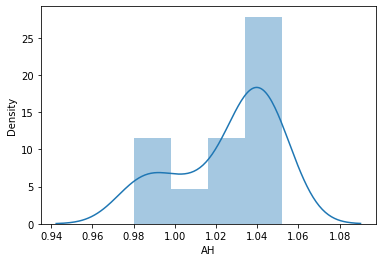

In [63]:
sns.distplot(dfPlot['AH'], kde = True)

C:\Users\patol\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AH', ylabel='Density'>

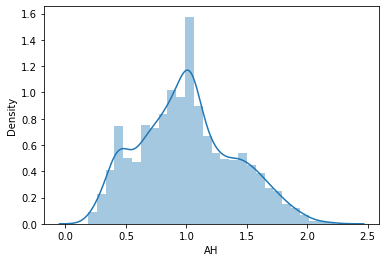

In [64]:
sns.distplot(dfSQ['AH'], kde = True)

Our data follows Normal like function but there is noise present

C:\Users\patol\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='T', ylabel='Density'>

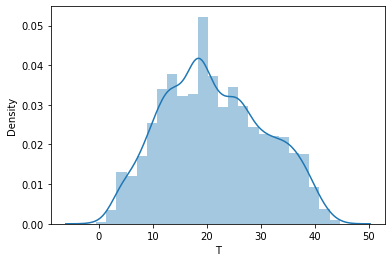

In [65]:
sns.distplot(dfSQ['T'], kde = True)

<AxesSubplot:xlabel='AH'>

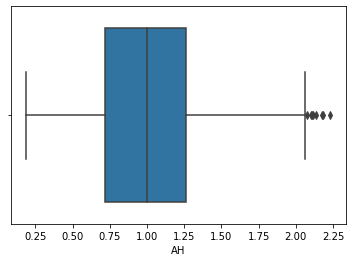

In [66]:
sns.boxplot(x = dfSQ["AH"])

Here we can see from the box plot that there are outliers in the data that are present and effecting the data

<AxesSubplot:xlabel='T'>

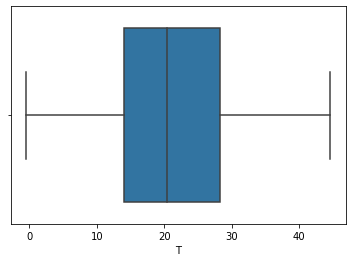

In [67]:
sns.boxplot(x = dfSQ["T"])

In [68]:
dfSQ["AH"].describe()

count   3,118.00
mean        1.00
std         0.39
min         0.19
25%         0.72
50%         1.00
75%         1.26
max         2.23
Name: AH, dtype: float64

Hm, the maximum value is far away from the sum of standard deviation and mean 

In [69]:
dfSQ["T"].describe()

count   3,118.00
mean       21.33
std         9.38
min        -0.50
25%        14.00
50%        20.40
75%        28.20
max        44.60
Name: T, dtype: float64

 as we can see in out dataset, for absolute humidity values there are outliers are present which might effect our analysis. lets see how many data points are present outside two times of our standard Deviation.

# Handeling the Outliers

In [70]:
dfSQ["AH"].mean()

1.00450025361403

checking value of mean + 2*sigma

In [71]:
dfSQ["AH"].mean() + 2* dfSQ["AH"].std()

1.7924434320401605

checking how many values are present on each side of outlier so that we can decide what we have to do with outliers data and see how it is effecting our analysis

In [72]:
dfSQ[dfSQ["AH"] < (dfSQ["AH"].mean() - 2.5* dfSQ["AH"].std())]

,Date,Time,COGT,PT08S1,NMHC,C6H6,PT08S2,NOxGT,PT08S3,NO2GT,PT08S4,PT08S5,T,RH,AH


We see there are not many outliers on left side of the data. Lets see how many data points are present at right oulying points

In [73]:
dfSQ[dfSQ["AH"] > (dfSQ["AH"].mean() + 2.5* dfSQ["AH"].std())]

,Date,Time,COGT,PT08S1,NMHC,C6H6,PT08S2,NOxGT,PT08S3,NO2GT,PT08S4,PT08S5,T,RH,AH
3550,2004-05-08,16.00.00,2.15,"1,067.00",218.81,7.00,855.00,90.00,748.00,102.00,"1,700.00",811.00,23.90,69.10,2.02
3567,2004-06-08,09.00.00,2.90,"1,229.00",218.81,16.30,"1,188.00",237.00,557.00,97.00,"2,033.00","1,412.00",24.50,66.20,2.00
3618,2004-08-08,12.00.00,1.40,"1,032.00",218.81,4.60,744.00,87.00,813.00,79.00,"1,695.00",778.00,25.40,68.00,2.18
3687,2004-11-08,09.00.00,1.80,"1,165.00",218.81,9.70,967.00,93.00,651.00,58.00,"1,825.00","1,120.00",29.80,51.10,2.11
3688,2004-11-08,10.00.00,1.80,"1,179.00",218.81,9.50,957.00,105.00,680.00,67.00,"1,819.00","1,131.00",33.60,41.00,2.10
3689,2004-11-08,11.00.00,1.70,"1,144.00",218.81,8.30,913.00,89.00,715.00,68.00,"1,782.00",972.00,35.10,38.10,2.11
3690,2004-11-08,12.00.00,1.30,"1,066.00",218.81,6.00,813.00,63.00,792.00,56.00,"1,657.00",764.00,36.20,34.90,2.06
3691,2004-11-08,13.00.00,1.30,"1,056.00",218.81,5.80,802.00,52.00,824.00,47.00,"1,620.00",670.00,38.00,30.70,2.00
3711,2004-12-08,09.00.00,1.90,"1,126.00",218.81,9.50,957.00,122.00,694.00,71.00,"1,841.00","1,034.00",29.40,53.10,2.14
3712,2004-12-08,10.00.00,1.50,"1,066.00",218.81,6.90,855.00,101.00,803.00,61.00,"1,712.00",929.00,33.40,39.90,2.02


The outlier points of absolute humidity in our dataset as above and they are very less compare to number of data points we have. i.e Approximately 15 our of 3118 data points

As the outliers points are very less, we can handle them by removing the these points from our data and start analyzing. If they were more and affecting our mean value and statistics then we could have decided to find any other way to handle it. But for now, we feel it is okay to remove them and proceed forward

# Removing Outliers

In [74]:
dfSQ = dfSQ[dfSQ["AH"] < (dfSQ["AH"].mean() + 2.5* dfSQ["AH"].std())]
dfSQ

,Date,Time,COGT,PT08S1,NMHC,C6H6,PT08S2,NOxGT,PT08S3,NO2GT,PT08S4,PT08S5,T,RH,AH
15,2004-11-03,09.00.00,2.20,"1,351.00",87.00,9.50,960.00,129.00,"1,079.00",101.00,"1,583.00","1,028.00",10.50,60.60,0.77
16,2004-11-03,10.00.00,1.70,"1,233.00",77.00,6.30,827.00,112.00,"1,218.00",98.00,"1,446.00",860.00,10.80,58.40,0.76
17,2004-11-03,11.00.00,1.50,"1,179.00",43.00,5.00,762.00,95.00,"1,328.00",92.00,"1,362.00",671.00,10.50,57.90,0.74
18,2004-11-03,12.00.00,1.60,"1,236.00",61.00,5.20,774.00,104.00,"1,301.00",95.00,"1,401.00",664.00,9.50,66.80,0.80
19,2004-11-03,13.00.00,1.90,"1,286.00",63.00,7.30,869.00,146.00,"1,162.00",112.00,"1,537.00",799.00,8.30,76.40,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10.00.00,3.10,"1,314.00",218.81,13.50,"1,101.00",472.00,539.00,190.00,"1,374.00","1,729.00",21.90,29.30,0.76
9353,2005-04-04,11.00.00,2.40,"1,163.00",218.81,11.40,"1,027.00",353.00,604.00,179.00,"1,264.00","1,269.00",24.30,23.70,0.71
9354,2005-04-04,12.00.00,2.40,"1,142.00",218.81,12.40,"1,063.00",293.00,603.00,175.00,"1,241.00","1,092.00",26.90,18.30,0.64
9355,2005-04-04,13.00.00,2.10,"1,003.00",218.81,9.50,961.00,235.00,702.00,156.00,"1,041.00",770.00,28.30,13.50,0.51



Now our data of absolute Humidity is free from outliers

<AxesSubplot:xlabel='AH'>

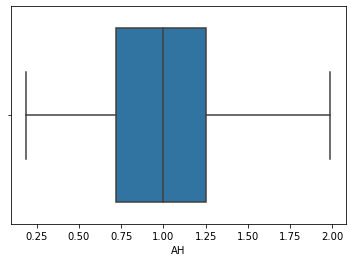

In [75]:
sns.boxplot(x = dfSQ["AH"])

now our data looks clean and good to go ahead.

# correlation matrix

In [76]:
dfSQ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3104 entries, 15 to 9356
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3104 non-null   datetime64[ns]
 1   Time    3104 non-null   object        
 2   COGT    3104 non-null   float64       
 3   PT08S1  3104 non-null   float64       
 4   NMHC    3104 non-null   float64       
 5   C6H6    3104 non-null   float64       
 6   PT08S2  3104 non-null   float64       
 7   NOxGT   3104 non-null   float64       
 8   PT08S3  3104 non-null   float64       
 9   NO2GT   3104 non-null   float64       
 10  PT08S4  3104 non-null   float64       
 11  PT08S5  3104 non-null   float64       
 12  T       3104 non-null   float64       
 13  RH      3104 non-null   float64       
 14  AH      3104 non-null   float64       
dtypes: datetime64[ns](1), float64(13), object(1)
memory usage: 388.0+ KB


In [77]:
dfSQ.describe()

,COGT,PT08S1,NMHC,C6H6,PT08S2,NOxGT,PT08S3,NO2GT,PT08S4,PT08S5,T,RH,AH
count,"3,104.00","3,104.00","3,104.00","3,104.00","3,104.00","3,104.00","3,104.00","3,104.00","3,104.00","3,104.00","3,104.00","3,104.00","3,104.00"
mean,2.30,"1,136.99",222.70,11.40,"1,001.33",279.79,783.07,123.03,"1,485.68","1,060.63",21.30,40.83,1.00
std,1.13,195.70,54.08,6.29,219.88,205.54,208.41,42.19,312.66,401.64,9.38,16.66,0.39
min,0.10,667.00,35.00,0.40,429.00,8.00,345.00,5.00,647.00,291.00,-0.50,9.20,0.19
25%,1.60,990.00,218.81,6.70,842.00,137.00,628.00,99.00,"1,297.00",756.00,13.90,27.48,0.72
50%,2.15,"1,105.00",218.81,10.30,987.50,246.90,778.00,113.09,"1,505.00","1,022.91",20.30,38.90,1.00
75%,2.80,"1,269.25",218.81,15.03,"1,150.00",341.25,899.00,144.00,"1,701.25","1,338.25",28.20,51.80,1.25
max,8.10,"1,961.00",798.00,63.70,"2,214.00","1,247.00","2,542.00",340.00,"2,665.00","2,346.00",44.60,88.70,1.99


we confirmed that our data has all numeric values and we can model them using mathematical models on them

We considering data from second Quater of the day. This is because during the whole day, at this part of time our remains right infront of our heads and temparature almost feels constant and hence we can do some good analysis

Plotting heatmap of correlation matrix to understand the independent parameters on which our finding parameters are depending

<AxesSubplot:>

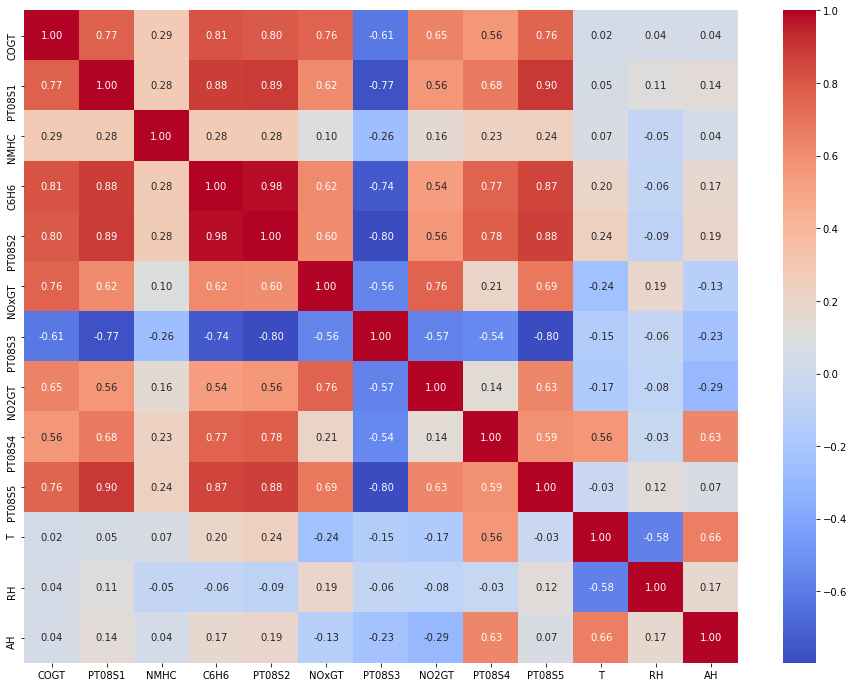

In [78]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap='coolwarm')

We can clearly see there is good correlation of absolute Humidyty with vary in Temparature, tungsten oxide with NO2, and NO2 content of the air

In [79]:
pip install dcor

Note: you may need to restart the kernel to use updated packages.


In [80]:
import dcor
def dist_corr(X, Y, pval=True, nruns=2000):
    """ Distance correlation with p-value from bootstrapping
    """
    dc = dcor.distance_correlation(X, Y)
    pv = dcor.independence.distance_covariance_test(X, Y, exponent=1.0, num_resamples=nruns)[0]
    if pval:
        return (dc, pv)
    else:
        return dc
def corrfunc(x, y, **kws):
    d, p = dist_corr(x,y) 
    #print("{:.4f}".format(d), "{:.4f}".format(p))
    if p > 0.1:
        pclr = 'Darkgray'
    else:
        pclr= 'Darkblue'
    ax = pyplot.gca()
    ax.annotate("DC = {:.2f}".format(d), xy=(.1, 0.99), xycoords=ax.transAxes, color = pclr, fontsize = 14)


In [81]:
# Create the distance method using distance_correlation
data2 = dfSQ.drop(labels = ["Date","Time"], axis = 1)
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2) 

# Apply the distance method pairwise to every column
rslt = data2.apply(lambda col1: data2.apply(lambda col2: distcorr(col1, col2)))

# check output
pd.options.display.float_format = '{:,.2f}'.format
rslt

,COGT,PT08S1,NMHC,C6H6,PT08S2,NOxGT,PT08S3,NO2GT,PT08S4,PT08S5,T,RH,AH
COGT,1.00,0.74,0.25,0.78,0.78,0.75,0.64,0.61,0.48,0.77,0.24,0.37,0.14
PT08S1,0.74,1.00,0.24,0.84,0.83,0.56,0.77,0.46,0.60,0.88,0.21,0.43,0.23
NMHC,0.25,0.24,1.00,0.23,0.22,0.17,0.24,0.16,0.23,0.20,0.12,0.04,0.16
C6H6,0.78,0.84,0.23,1.00,1.00,0.56,0.75,0.48,0.69,0.87,0.15,0.27,0.24
PT08S2,0.78,0.83,0.22,1.00,1.00,0.54,0.76,0.48,0.70,0.87,0.15,0.25,0.25
NOxGT,0.75,0.56,0.17,0.56,0.54,1.00,0.63,0.73,0.15,0.68,0.42,0.46,0.12
PT08S3,0.64,0.77,0.24,0.75,0.76,0.63,1.00,0.54,0.43,0.81,0.16,0.40,0.26
NO2GT,0.61,0.46,0.16,0.48,0.48,0.73,0.54,1.00,0.16,0.58,0.35,0.20,0.27
PT08S4,0.48,0.60,0.23,0.69,0.70,0.15,0.43,0.16,1.00,0.51,0.48,0.14,0.67
PT08S5,0.77,0.88,0.20,0.87,0.87,0.68,0.81,0.58,0.51,1.00,0.23,0.42,0.15


As we can see from the correlation table that out dependent variable is highly correlated with PT08S4(Tungton Oxide), Temparature and NO2 content of the air

Filtering our dataset to only dependenet columns and removing columns that are not effecting our parameters to avoid Bad Machine Learning. It is good practise to keep variables that are effecting out dependent parameters and remove unnecesary things from dataset 

Here we can see hoe the content of our tungsten oxide and NO2 content is varying throughout the day

C:\Users\patol\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PT08S4', ylabel='Density'>

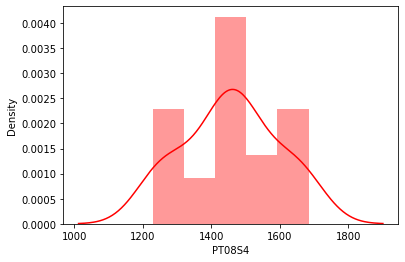

In [82]:
sns.distplot(dfPlot['PT08S4'], kde = True, color = "Red")

C:\Users\patol\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NO2GT', ylabel='Density'>

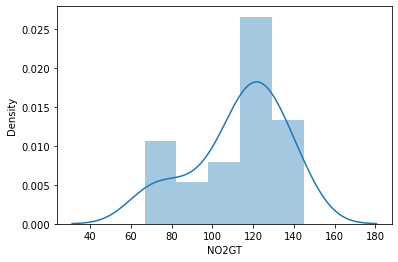

In [83]:
sns.distplot(dfPlot['NO2GT'], kde = True)

In [84]:
dfSQforAnalysis = dfSQ[["PT08S4", "AH", "NO2GT", "T"]]
dfSQforAnalysis

,PT08S4,AH,NO2GT,T
15,"1,583.00",0.77,101.00,10.50
16,"1,446.00",0.76,98.00,10.80
17,"1,362.00",0.74,92.00,10.50
18,"1,401.00",0.80,95.00,9.50
19,"1,537.00",0.84,112.00,8.30
...,...,...,...,...
9352,"1,374.00",0.76,190.00,21.90
9353,"1,264.00",0.71,179.00,24.30
9354,"1,241.00",0.64,175.00,26.90
9355,"1,041.00",0.51,156.00,28.30


# Processing our data

# Model 1: processing out: R model with Randomforest Algorithm

In [85]:
X = dfSQforAnalysis.drop(['AH'], axis=1)
X

,PT08S4,NO2GT,T
15,"1,583.00",101.00,10.50
16,"1,446.00",98.00,10.80
17,"1,362.00",92.00,10.50
18,"1,401.00",95.00,9.50
19,"1,537.00",112.00,8.30
...,...,...,...
9352,"1,374.00",190.00,21.90
9353,"1,264.00",179.00,24.30
9354,"1,241.00",175.00,26.90
9355,"1,041.00",156.00,28.30


In [86]:
y = dfSQforAnalysis[["AH"]]
y

,AH
15,0.77
16,0.76
17,0.74
18,0.80
19,0.84
...,...
9352,0.76
9353,0.71
9354,0.64
9355,0.51


In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a model 
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
rf_model.score(X_test, y_test)

<ipython-input-88-c3df1279bdc5>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


0.7237261097088546

hm, Accuracy of 72 percent. that means our model is good trained model

In [89]:
y_pred = rf_model.predict(X_test)

In [90]:
y_test2 = y_test.to_numpy()

In [91]:
print(y_pred[0:10])
print(y_test2[0:10])

[1.492315   0.636414   1.04846    1.601899   1.05603    1.346393
 0.99749434 1.056164   0.948523   1.498321  ]
[[1.4499    ]
 [0.4599    ]
 [1.0724    ]
 [1.1271    ]
 [1.4487    ]
 [1.4653    ]
 [1.02553027]
 [0.9652    ]
 [0.9727    ]
 [1.1548    ]]


# Plotting our predictions

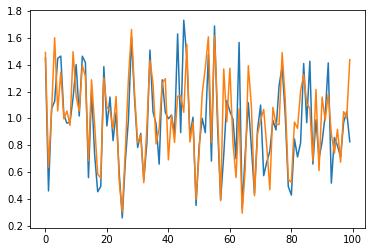

In [92]:
import matplotlib.pyplot as plt
plt.plot(y_test2[:100])
plt.plot(y_pred[:100])

In [93]:
pd.concat([pd.Series(y_pred), y_test.reset_index(drop=True)], axis=1)

,0,AH
0,1.49,1.45
1,0.64,0.46
2,1.05,1.07
3,1.60,1.13
4,1.06,1.45
...,...,...
771,1.02,1.00
772,0.39,0.41
773,0.81,0.77
774,1.37,1.72


In [94]:
sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True)

[('PT08S4', 0.5543028530524021),
 ('T', 0.28915011404097735),
 ('NO2GT', 0.15654703290662048)]

We can conclude that out of all the metallic harmful gasses that are recorded, tungsten oxide is effecting our humidity, following by Temparature.

# Doing Analysis with Bayesian Model

# Bayesian Estimation using pymc3 module

In [102]:
from pymc3 import Model, Uniform, Normal, Gamma

with Model() as absoluteHumidity:
    alpha = Uniform('alpha', 0, 10)
    beta = Uniform('beta', 0, 20)

In [103]:
with absoluteHumidity:    
    y = Gamma('y', alpha = alpha, beta = beta, observed=dfSQforAnalysis["AH"]) #likelihood

In [104]:
from pymc3 import fit
RANDOM_SEED = 20090425

with absoluteHumidity:

    samplesGamma1 = fit(random_seed=RANDOM_SEED).sample(500)

TypeError: Unknown parameter type: <class 'theano.tensor.var.TensorVariable'>

In [98]:
alphas = samplesGamma1['alpha']
betas = samplesGamma1['beta']

NameError: name 'samplesGamma1' is not defined

In [ ]:
humidSample = Gamma.dist(alpha = alphas, beta = betas).random()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(humidSample, label='simulated')
sns.distplot(dfSQforAnalysis["AH"], label='observed')
plt.legend()

# Repeating the model with Linear algebra multivariate distribution


In [49]:
import pymc3 as pm
with pm.Model() as glm_model:
    pm.glm.GLM.from_formula('AH ~ PT08S4 + NO2GT + T',
                            dfSQforAnalysis,
                            family=pm.glm.families.Normal())
    trace2 = pm.sample(1000, tune=1000, init='adapt_diag', cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


TypeError: Unknown parameter type: <class 'theano.tensor.var.TensorVariable'>

In [ ]:
import arviz as arviz
arviz.plot_trace(trace2)

In [ ]:
arviz.plot_posterior(trace2[500:], var_names=['Intercept', 'PT08S4', 'NO2GT', 'T'])

After our analysis we can conclude that our Humidity is depending on these three parameters. And by linear analysis we can make a dependency Equation as follows

$$AH= -0.075 + 0.0069 \text{PTO8S4} - 0.0018\text{NO2GT} + 0.012 * \text{T}$$

## Conclusion 
Using above model we have analysed the real time data that was recorded in Italy and analyzed on what harmful chemicals are actually effecting our Humidity